In [1]:
import random
random.seed(42)
import torch
torch.manual_seed(42)

In [2]:
from vehicles import CompromiseState, Vehicle, VehicleProvider, Vulnerability

class RubbishVehicleProvider(VehicleProvider):
    def __init__(self) -> None:
        self.max_vulns=1

    def next(self) -> Vehicle:
        return Vehicle(
            10,
            [
                Vulnerability(0.5,2,CompromiseState.NOT_COMPROMISED),
            ]
        )

vehicle_provider=RubbishVehicleProvider()

In [3]:
vehicle_provider.next()

Vehicle(risk=10, in_platoon=False, vulnerabilities=[Vulnerability(prob=0.5, severity=2, state=<CompromiseState.NOT_COMPROMISED: 1>)])

In [4]:
from game import GameConfig

game_config=GameConfig(
    max_vehicles=30,
    cycle_every=None,
)

In [5]:
from agents import PassiveAgent
attacker = PassiveAgent()

In [6]:
from agents import WolpertingerDefenderAgent
from models import StateShapeData

defender=WolpertingerDefenderAgent(
    state_shape_data=StateShapeData(
        num_vehicles=game_config.max_vehicles,
        num_vehicle_features=Vehicle.get_shape()[0],
        num_vulns=vehicle_provider.max_vulns,
        num_vuln_features=Vulnerability.get_shape()[0]
    )
)

c:\Users\TeamD\.conda\envs\subgame\lib\site-packages\torch\nn\modules\lazy.py:178: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [7]:
from training import WolpertingerDefenderAgentTrainer
trainer = WolpertingerDefenderAgentTrainer(
    batch_size=1000,
)

In [ ]:
stats_history = []

In [8]:
trainer.train(
    game_config=game_config,
    vehicle_provider=vehicle_provider,
    episodes=29,
    max_steps_per_episode=30,
    defender_agent=defender,
    attacker_agent=attacker,
    warmup=1000,
    metrics_callback=stats_history.append
)

episode 0 step 0 
episode 0 step 1 
episode 0 step 2 
episode 0 step 3 
episode 0 step 4 
episode 0 step 5 
episode 0 step 6 
episode 0 step 7 
episode 0 step 8 
episode 0 step 9 
episode 0 step 10 
episode 0 step 11 
episode 0 step 12 
episode 0 step 13 
episode 0 step 14 
episode 0 step 15 
episode 0 step 16 
episode 0 step 17 
episode 0 step 18 
episode 0 step 19 
episode 0 step 20 
episode 0 step 21 
episode 0 step 22 
episode 0 step 23 
episode 0 step 24 
episode 0 step 25 
episode 0 step 26 
episode 0 step 27 
episode 0 step 28 
episode 0 step 29 
episode 1 step 0 
episode 1 step 1 
episode 1 step 2 
episode 1 step 3 
episode 1 step 4 
episode 1 step 5 
episode 1 step 6 
episode 1 step 7 
episode 1 step 8 
episode 1 step 9 
episode 1 step 10 
episode 1 step 11 
episode 1 step 12 
episode 1 step 13 
episode 1 step 14 
episode 1 step 15 
episode 1 step 16 
episode 1 step 17 
episode 1 step 18 
episode 1 step 19 
episode 1 step 20 
episode 1 step 21 
episode 1 step 22 
episode 1 ste

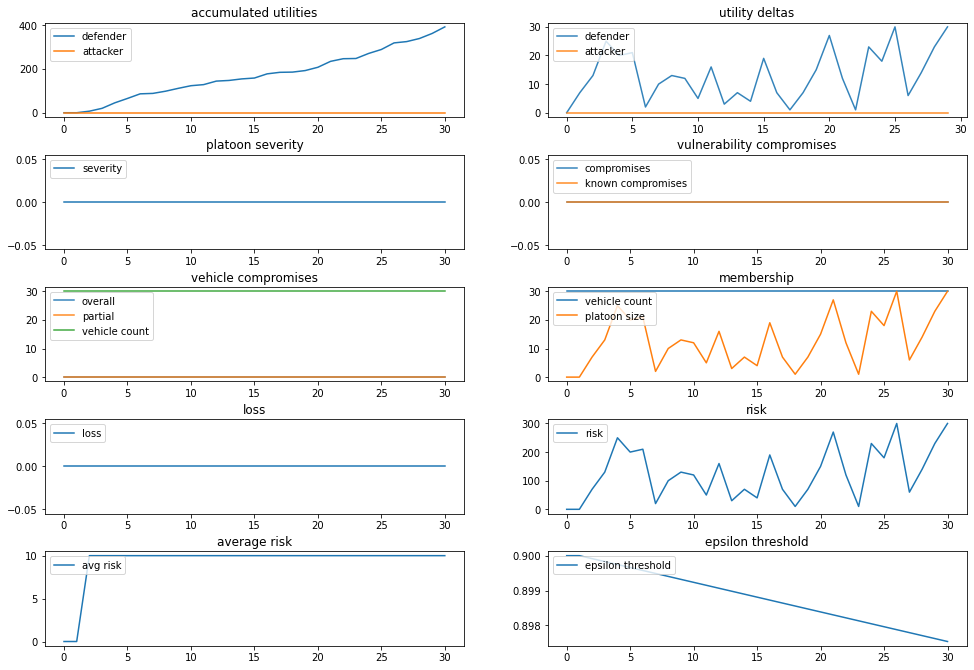

In [9]:
stats_history[0].plot()

In [7]:
from models import DefenderActionTensorBatch, StateTensorBatch
from utils import get_device

a = defender.get_action(engine.game.state)
state = engine.game.state.as_tensors(defender.state_shape_data)
state = StateTensorBatch(
    vulnerabilities=state.vulnerabilities.to(get_device()),
    vehicles=state.vehicles.to(get_device()),
)
print("state", state.vehicles.shape, state.vulnerabilities.shape)
action = a.as_tensor(defender.state_shape_data)
action = DefenderActionTensorBatch(
    members=action.members.to(get_device()),
    monitor=action.monitor.to(get_device()),
)

print("action", action.members.shape, action.monitor.shape)
print(action)
q_values = defender.critic(state,action) 
print("q", q_values)
print("actual", defender.get_utility(defender.take_action(engine.game.state, a)))


state torch.Size([1, 30, 2]) torch.Size([1, 30, 1, 4])
action torch.Size([1, 1, 30]) torch.Size([1, 1, 30])
DefenderActionTensorBatch(members=tensor([[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]]), monitor=tensor([[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]]))
q tensor([[30.8027]], grad_fn=<ReshapeAliasBackward0>)
actual 30
